# Part 1: Unsupervised Learning Algorithms


In [188]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [189]:
countries_data = pd.read_csv('Countries of the world.csv',  decimal=",");

In [190]:
countries_data.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [191]:
countries_data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [192]:
from sklearn.preprocessing import LabelEncoder
df =countries_data.copy()
le_encoders = {}
le = LabelEncoder()
le_encoders['Country'] = le
df['Country'] = le.fit_transform(df['Country'])


le_encoders['Region'] = le
df['Region'] = le.fit_transform(df['Region'])

In [193]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0,0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,1,3,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,2,6,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,3,8,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,4,10,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


# Answer for Q1 
It is not a good idea to fill in missing value with Mean.
Following fours distribution graphs below, the graphs showing that fill in missing value with mean of each featuere does not make sense. This is because some features has normal distribution, for example climate, but some features do not have normal one such as left screw in Net migration and infant mortality or right screw in Literacy. Thus, most value is not normal distribution enough to fill in with Mean.

Text(0.5, 1.0, 'The histogram showing the distribution of Net migration')

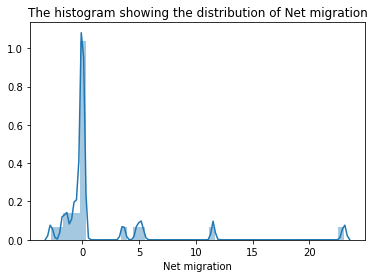

In [194]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.distplot(df[df.Region==0]['Net migration'])
plt.title("The histogram showing the distribution of Net migration")

Text(0.5, 1.0, 'The histogram showing the distribution of Infant mortality')

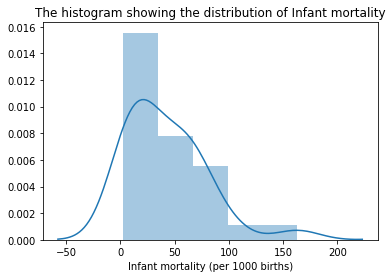

In [195]:
sns.distplot(df[df.Region==0]['Infant mortality (per 1000 births)'])
plt.title("The histogram showing the distribution of Infant mortality")

Text(0.5, 1.0, 'The histogram showing the distribution of Literacy')

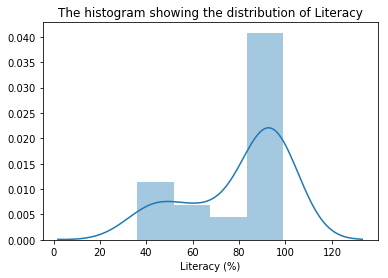

In [196]:
sns.distplot(df[df.Region==0]['Literacy (%)'])
plt.title("The histogram showing the distribution of Literacy")

Text(0.5, 1.0, 'The histogram showing the distribution of Climate')

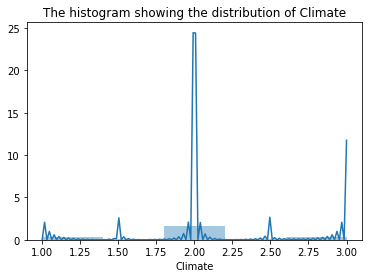

In [197]:
sns.distplot(df[df.Region==0]['Climate'])
plt.title("The histogram showing the distribution of Climate")

Fill in missing value wiht mean value for each feature

In [198]:
df.head(280)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0,0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,1,3,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,2,6,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,3,8,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,4,10,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
5,5,9,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,NaN,45.11,24.20,0.096,0.658,0.246
6,6,4,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,7,4,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
8,8,4,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,220.4,12.31,0.48,87.21,3.0,16.73,7.55,0.095,0.358,0.547
9,9,2,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,195.7,17.55,2.30,80.15,4.0,12.07,8.23,0.239,0.343,0.418


In [199]:
for column in df.columns:
    mean = df[column].mean()
    df[column].fillna(mean, inplace = True)
    print(df[column].mean())

113.0
5.7312775330396475
28740284.365638766
598226.9559471365
379.04713656387634
21.16533039647578
0.038125000000000034
35.50696428571427
9689.823008849558
82.83827751196175
236.06143497757853
13.797111111111102
4.564222222222223
81.63831111111121
2.1390243902439017
22.114732142857147
9.24134529147982
0.15084433962264152
0.2827109004739339
0.565283018867925


In [200]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

In [201]:
list(df.columns.values)

['Country',
 'Region',
 'Population',
 'Area (sq. mi.)',
 'Pop. Density (per sq. mi.)',
 'Coastline (coast/area ratio)',
 'Net migration',
 'Infant mortality (per 1000 births)',
 'GDP ($ per capita)',
 'Literacy (%)',
 'Phones (per 1000)',
 'Arable (%)',
 'Crops (%)',
 'Other (%)',
 'Climate',
 'Birthrate',
 'Deathrate',
 'Agriculture',
 'Industry',
 'Service']

In [202]:
from sklearn.preprocessing import StandardScaler
features = [ 'Population',
 'Area (sq. mi.)',
 'Pop. Density (per sq. mi.)',
 'Coastline (coast/area ratio)',
 'Net migration',
 'Infant mortality (per 1000 births)',
 'GDP ($ per capita)',
 'Literacy (%)',
 'Phones (per 1000)',
 'Arable (%)',
 'Crops (%)',
 'Other (%)',
 'Climate',
 'Birthrate',
 'Deathrate',
 'Agriculture',
 'Industry',
 'Service',
]
x_scale = df.loc[:, features].values
x_scale = StandardScaler().fit_transform(x_scale)
print(x_scale)


[[ 0.01969468  0.02758332 -0.19984434 ...  1.61913212 -0.32114937
  -1.15881848]
 [-0.21387688 -0.31879748 -0.15360296 ...  0.57341694 -0.71214481
   0.08579033]
 [ 0.03561811  0.99842051 -0.22048996 ... -0.35218232  2.38574214
  -1.67167236]
 ...
 [-0.06192308 -0.03933023 -0.20431152 ... -0.11195045  1.42329182
  -1.07751238]
 [-0.14654488  0.08642673 -0.21958445 ...  0.48862922  0.05480778
  -0.47709808]
 [-0.14029829 -0.11624192 -0.20992568 ...  0.19893785 -0.29859194
   0.08579033]]


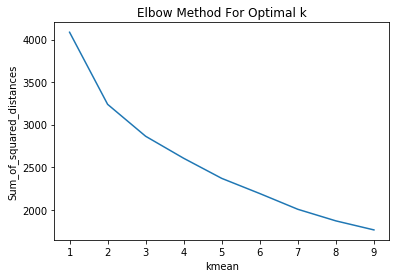

In [203]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
for k in range(1,10):
    model_kmean = KMeans(n_clusters=k)
    kmean = model_kmean.fit(x_scale)
    Sum_of_squared_distances.append(kmean.inertia_)

plt.plot(range(1,10), Sum_of_squared_distances)
plt.xlabel('kmean')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Q2
Following the Elbow graph above, K value equal to 2 is selected based on Elbow point. 

In [204]:
kmeans = KMeans(n_clusters=2)
model_kmeans = kmeans.fit(x_scale)
cluster_region = model_kmeans.predict(x_scale)
print(cluster_region)

[1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0
 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1
 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0
 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1
 0 1 1 1 1]


In [205]:
df['Cluster_region'] = cluster_region

In [206]:
df.head(50)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Cluster_region
0,0,0,31056997,647500,48.0,0.00,23.060000,163.070000,700.0,36.000000,...,12.13,0.22,87.65,1.000000,46.60,20.340000,0.380000,0.240000,0.380000,1
1,1,3,3581655,28748,124.6,1.26,-4.930000,21.520000,4500.0,86.500000,...,21.09,4.42,74.49,3.000000,15.11,5.220000,0.232000,0.188000,0.579000,0
2,2,6,32930091,2381740,13.8,0.04,-0.390000,31.000000,6000.0,70.000000,...,3.22,0.25,96.53,1.000000,17.14,4.610000,0.101000,0.600000,0.298000,1
3,3,8,57794,199,290.4,58.29,-20.710000,9.270000,8000.0,97.000000,...,10.00,15.00,75.00,2.000000,22.46,3.270000,0.150844,0.282711,0.565283,0
4,4,10,71201,468,152.1,0.00,6.600000,4.050000,19000.0,100.000000,...,2.22,0.00,97.78,3.000000,8.71,6.250000,0.150844,0.282711,0.565283,0
5,5,9,12127071,1246700,9.7,0.13,0.000000,191.190000,1900.0,42.000000,...,2.41,0.24,97.35,2.139024,45.11,24.200000,0.096000,0.658000,0.246000,1
6,6,4,13477,102,132.1,59.80,10.760000,21.030000,8600.0,95.000000,...,0.00,0.00,100.00,2.000000,14.17,5.340000,0.040000,0.180000,0.780000,0
7,7,4,69108,443,156.0,34.54,-6.150000,19.460000,11000.0,89.000000,...,18.18,4.55,77.27,2.000000,16.93,5.370000,0.038000,0.220000,0.743000,0
8,8,4,39921833,2766890,14.4,0.18,0.610000,15.180000,11200.0,97.100000,...,12.31,0.48,87.21,3.000000,16.73,7.550000,0.095000,0.358000,0.547000,0
9,9,2,2976372,29800,99.9,0.00,-6.470000,23.280000,3500.0,98.600000,...,17.55,2.30,80.15,4.000000,12.07,8.230000,0.239000,0.343000,0.418000,0


In [208]:
df.drop(['Region','Country'],axis = 1,inplace = True)

In [209]:
df.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Cluster_region
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380000,0.240000,0.380000,1
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232000,0.188000,0.579000,0
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101000,0.600000,0.298000,1
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.150844,0.282711,0.565283,0
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.150844,0.282711,0.565283,0


# Q2
suggest characteristics of each cluster

Cluster region 0 is  more increasinglly dispersed GDP than cluster region 1 comparing with the group of poppulation

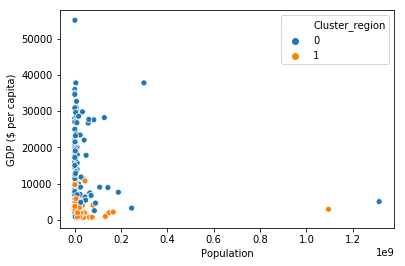

In [210]:
import seaborn as sns
sns.scatterplot(df['Population'] ,df['GDP ($ per capita)'],hue =df['Cluster_region'] )

Cluster region 0 is  more increasinglly dispersed GDP than cluster region 1 comparing with the net migration

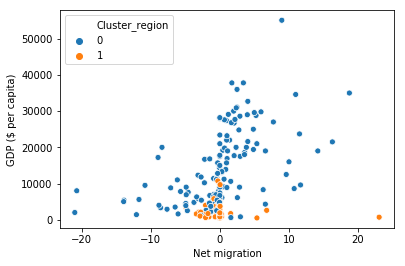

In [226]:
sns.scatterplot(df['Net migration'] ,df['GDP ($ per capita)'],hue =df['Cluster_region'] )

Cluster region 1 is  more increasinglly dispersed in Agriculture than cluster region 1 with industry area is more clustered

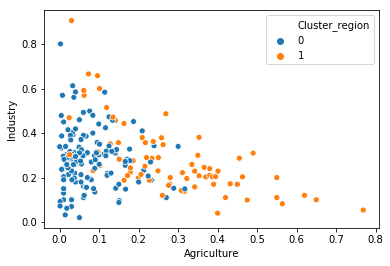

In [227]:
sns.scatterplot(df['Agriculture'] ,df['Industry'],hue =df['Cluster_region'] )

Cluster region 0 has the higher rate in Birthrate, whreas cluster region 1 has the higher rate in Deathrate

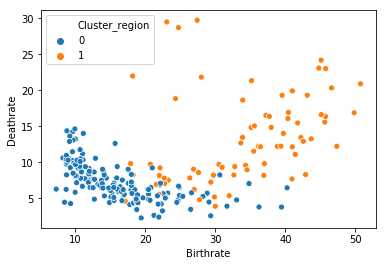

In [228]:
sns.scatterplot(df['Birthrate'] ,df['Deathrate'],hue =df['Cluster_region'] )

Cluster region 0 is  more increasinglly dispersed GDP than cluster region 1 comparing with the industry

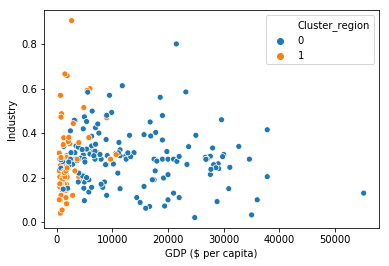

In [236]:
sns.scatterplot(df['GDP ($ per capita)'],df['Industry'] ,hue =df['Cluster_region'] )

Cluster region 0 is  more increasinglly dispersed GDP than cluster region 1 comparing with the agriculture that is less than cluster region 1.

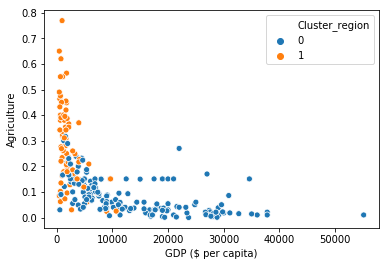

In [233]:
sns.scatterplot(df['GDP ($ per capita)'] ,df['Agriculture'],hue =df['Cluster_region'] )

In [211]:
list(df.columns.values)

['Population',
 'Area (sq. mi.)',
 'Pop. Density (per sq. mi.)',
 'Coastline (coast/area ratio)',
 'Net migration',
 'Infant mortality (per 1000 births)',
 'GDP ($ per capita)',
 'Literacy (%)',
 'Phones (per 1000)',
 'Arable (%)',
 'Crops (%)',
 'Other (%)',
 'Climate',
 'Birthrate',
 'Deathrate',
 'Agriculture',
 'Industry',
 'Service',
 'Cluster_region']

# Q2
PCA graph to show cluster Region

In [212]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_scale)

[0.29805844 0.13777455]


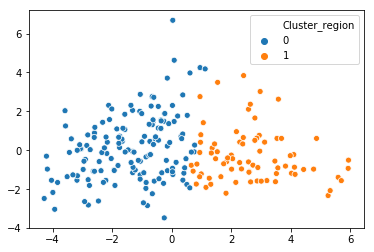

In [213]:
import seaborn as sns
print(pca.explained_variance_ratio_)
sns.scatterplot(principalComponents[:,0] ,principalComponents[:,1],hue =df['Cluster_region'] )

# Q2
TSNE graph to show cluster Region

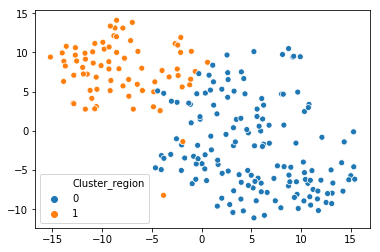

In [214]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(x_scale)
X_embedded.shape
sns.scatterplot(X_embedded[:,0] ,X_embedded[:,1],hue =df['Cluster_region'] )

Group cluster region by mean

In [215]:
df_copy =df.groupby(['Cluster_region']).mean()

In [216]:
df_copy.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Cluster_region,,,,,,,,,,,,,,,,,,
0,2.605008e+07,630134.317881,526.575497,30.637020,0.062372,15.005741,13429.139073,92.395855,336.463065,14.745610,5.512280,79.741446,2.324519,16.282680,7.325051,0.084994,0.284406,0.629938
1,3.408529e+07,534832.065789,85.931579,2.346579,-0.010049,76.239657,2260.392408,63.848879,36.579248,11.912594,2.680582,85.407083,1.770475,33.702098,13.048720,0.281678,0.279344,0.436823


# Q2
Group cluster region without "Region"

In [218]:
df_fill = countries_data.copy()

drop Region and Country column

In [219]:
df_fill.drop(['Region','Country'],axis = 1,inplace = True)

Regroup the countries by cluster and witout Region 

In [220]:
df_fill['Cluster_region'] =  cluster_region

In [221]:
df_fill.isnull().sum()

Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
Cluster_region                         0
dtype: int64

In [222]:
df_fill.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Cluster_region
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,1
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,0
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,1
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN,0
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN,0


# Q3
Fill in all missing values with the world average values of cluster

In [223]:
import math 
for count in range(4,len(df_fill.columns)):
    for i in  range(0,len(df_fill.index)):
        if (math.isnan(df_fill.iloc[i,count])):
            if (df_fill.loc[i,'Cluster_region'] == 1):
                df_fill.iloc[i,count] = df_copy.iloc[1,count]
            else:
                df_fill.iloc[i,count] = df_copy.iloc[1,count]
   
        

In [224]:
df_fill.head(280)

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Cluster_region
0,31056997,647500,48.0,0.00,23.060000,163.070000,700.000000,36.000000,3.200000,12.13,0.22,87.65,1.000000,46.600000,20.34000,0.380000,0.240000,0.380000,1
1,3581655,28748,124.6,1.26,-4.930000,21.520000,4500.000000,86.500000,71.200000,21.09,4.42,74.49,3.000000,15.110000,5.22000,0.232000,0.188000,0.579000,0
2,32930091,2381740,13.8,0.04,-0.390000,31.000000,6000.000000,70.000000,78.100000,3.22,0.25,96.53,1.000000,17.140000,4.61000,0.101000,0.600000,0.298000,1
3,57794,199,290.4,58.29,-20.710000,9.270000,8000.000000,97.000000,259.500000,10.00,15.00,75.00,2.000000,22.460000,3.27000,0.281678,0.279344,0.436823,0
4,71201,468,152.1,0.00,6.600000,4.050000,19000.000000,100.000000,497.200000,2.22,0.00,97.78,3.000000,8.710000,6.25000,0.281678,0.279344,0.436823,0
5,12127071,1246700,9.7,0.13,0.000000,191.190000,1900.000000,42.000000,7.800000,2.41,0.24,97.35,1.770475,45.110000,24.20000,0.096000,0.658000,0.246000,1
6,13477,102,132.1,59.80,10.760000,21.030000,8600.000000,95.000000,460.000000,0.00,0.00,100.00,2.000000,14.170000,5.34000,0.040000,0.180000,0.780000,0
7,69108,443,156.0,34.54,-6.150000,19.460000,11000.000000,89.000000,549.900000,18.18,4.55,77.27,2.000000,16.930000,5.37000,0.038000,0.220000,0.743000,0
8,39921833,2766890,14.4,0.18,0.610000,15.180000,11200.000000,97.100000,220.400000,12.31,0.48,87.21,3.000000,16.730000,7.55000,0.095000,0.358000,0.547000,0
9,2976372,29800,99.9,0.00,-6.470000,23.280000,3500.000000,98.600000,195.700000,17.55,2.30,80.15,4.000000,12.070000,8.23000,0.239000,0.343000,0.418000,0


In [225]:
df_fill.isnull().sum()

Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
Cluster_region                        0
dtype: int64

## Part 2: GPD Prediction

# Q1 and Q2

Split out Thailan from the dataset and used for test data


Using linear regression to find the best model of polynomial degrees and alpha value along with measure MAE for these models of 5-fold cross validation.

In [58]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

degree = np.array([1,2,3,4,5]);
alpha = np.array([0.01, 0.1, 1.0, 10.0]);

X_KF =  df_fill.drop(df_fill.index[201]) #delete Thailand
X_KF = df_fill.drop('GDP ($ per capita)', axis=1)
Y_KF = df_fill['GDP ($ per capita)']
kf = KFold(n_splits=5)
print(kf.get_n_splits(X_KF))
print(kf)  
for i in degree:
    for j in alpha:
        error =[]
        for train_index, test_index in kf.split(X_KF):
           # print("TRAIN:", train_index, "TEST:", test_index)
        
            X_train_KF, X_test_KF = X_KF.iloc[train_index], X_KF.iloc[test_index]
            Y_train_KF, Y_test_KF = Y_KF.iloc[train_index], Y_KF.iloc[test_index]
            ss = StandardScaler()
            poly_degree= PolynomialFeatures(degree=i)
            X_train_degree = ss.fit_transform(poly_degree.fit_transform(X_train_KF))
            X_test_degree = ss.transform(poly_degree.fit_transform(X_test_KF))
        
            Ridge_alpaha = Ridge(alpha=j, copy_X=True, fit_intercept=True, max_iter=None,normalize=False, random_state=None, solver='auto', tol=0.001)
            Ridge_alpaha.fit(X_train_degree, Y_train_KF) 
            Ridge_predict= Ridge_alpaha.predict(X_test_degree)
            error.append(mean_absolute_error( Ridge_predict,Y_test_KF))
        print("Mean absolute error of degre",i,"alpha",j,": " ,sum(error)/float(len(error)) )

5
KFold(n_splits=5, random_state=None, shuffle=False)
Mean absolute error of degre 1 alpha 0.01 :  5750.848896146843
Mean absolute error of degre 1 alpha 0.1 :  5669.18931191533
Mean absolute error of degre 1 alpha 1.0 :  5511.999398528244
Mean absolute error of degre 1 alpha 10.0 :  5361.775370775882
Mean absolute error of degre 2 alpha 0.01 :  20751.11853272713
Mean absolute error of degre 2 alpha 0.1 :  10934.852529965267
Mean absolute error of degre 2 alpha 1.0 :  6841.242071842209
Mean absolute error of degre 2 alpha 10.0 :  5141.255502100871
Mean absolute error of degre 3 alpha 0.01 :  74176.84526524856
Mean absolute error of degre 3 alpha 0.1 :  53864.71684544384
Mean absolute error of degre 3 alpha 1.0 :  23936.86531807205
Mean absolute error of degre 3 alpha 10.0 :  11695.776615971929
Mean absolute error of degre 4 alpha 0.01 :  130953.01049347082
Mean absolute error of degre 4 alpha 0.1 :  123710.01243877996
Mean absolute error of degre 4 alpha 1.0 :  85928.68138459593
Mean a

Mean absolute error for each setting model. Degree 2 and alpha 10.0  will be selected for final model

In [75]:
Test_Thailand = df[(df['Country'])==201]
Test_Thailand 

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Cluster_region
201,201,0,64631595,514000,125.7,0.63,0.0,20.48,7400.0,92.6,...,29.36,6.46,64.18,2.0,13.87,7.04,0.099,0.441,0.46,0


In [76]:
Test_Thailand = Test_Thailand.drop(columns='Country')

In [78]:
Thailand_X = Test_Thailand.drop(columns='GDP ($ per capita)')
Thailand_Y = Test_Thailand['GDP ($ per capita)']
Thailand_X

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Cluster_region
201,0,64631595,514000,125.7,0.63,0.0,20.48,92.6,108.9,29.36,6.46,64.18,2.0,13.87,7.04,0.099,0.441,0.46,0


In [79]:
Thailand_Y

201    7400.0
Name: GDP ($ per capita), dtype: float64

In [91]:
Train = df.drop(df.index[201]) #deleteThailand
Train = Train.drop(columns='Country')
Train.head()

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Cluster_region
0,0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380000,0.240000,0.380000,1
1,3,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232000,0.188000,0.579000,0
2,6,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101000,0.600000,0.298000,1
3,8,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.150844,0.282711,0.565283,0
4,10,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.150844,0.282711,0.565283,0


In [92]:
Train_X = Train.drop(columns='GDP ($ per capita)')
Train_Y= Train['GDP ($ per capita)']

In [107]:
poly_degree_2 = PolynomialFeatures(degree=2)
ss = StandardScaler()
X_train_degree_2 = ss.fit_transform(poly_degree_2.fit_transform(Train_X))
X_test_degree_2 = ss.transform(poly_degree_2.fit_transform(Thailand_X))

# Q3
Predict GDP of Thailand with setting model of polynomial degree 2 and alpha 10.0

In [108]:
from sklearn.linear_model import Ridge
Ridge_model = Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,normalize=False, random_state=None, solver='auto', tol=0.001)
Ridge_model.fit(X_train_degree_2 , Train_Y) 
Ridge_predict_GDP_Thai = Ridge_model.predict( X_test_degree_2)
print(Ridge_predict_GDP_Thai )

[5446.81578628]


# Q3
measure MAE of GDP of Thailand

In [116]:
print("Mean absolute error of GDP of Thailand:" , mean_absolute_error( Ridge_predict_GDP_Thai , Thailand_Y))

Mean absolute error of GDP of Thailand: 1953.1842137152425


# Q4
Predict GDP of Thailand imaginary, when Thailand has changed the population in range  (-50,50) percentage

In [149]:
imagin = []
population = []
for j in range(-50,50,10):
    Test_Thailand_imaginary=Thailand_X.copy()
    Test_Thailand_imaginary['Population']=Test_Thailand_imaginary['Population']+(Test_Thailand_imaginary['Population']*(j/100))
    population.append(Test_Thailand_imaginary['Population'].tolist()[0])
    XXXX=ss.transform(poly_degree_2.fit_transform(Test_Thailand_imaginary))
    Predict_imaginary= Ridge_model.predict(XXXX)
    imagin.append(Predict_imaginary[0])
    

Population change between reduce 50% to increase 50%

The prediction based on population value above

In [150]:
print(imagin)

[5866.442523541112, 5782.517179472852, 5698.591833713087, 5614.666486261816, 5530.74113711904, 5446.815786284757, 5362.89043375897, 5278.965079541676, 5195.039723632876, 5111.1143660325715]


In [151]:
d = {'GDP': imagin,'Population': population}
Thailand_data_imaginary = pd.DataFrame(data=d)

In [152]:
Thailand_data_imaginary 

,GDP,Population
0,5866.442524,32315797.5
1,5782.517179,38778957.0
2,5698.591834,45242116.5
3,5614.666486,51705276.0
4,5530.741137,58168435.5
5,5446.815786,64631595.0
6,5362.890434,71094754.5
7,5278.965080,77557914.0
8,5195.039724,84021073.5
9,5111.114366,90484233.0


# Q4
The graph shows GDP along with population in imaginay thialand. Following the graph, the more population increase, the more GDP decrease

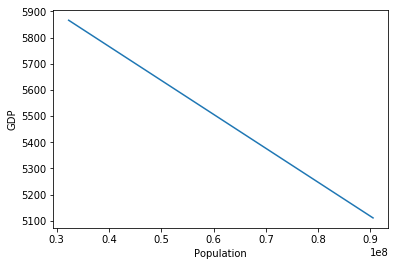

In [153]:
ax = sns.lineplot(x="Population", y="GDP",  data=Thailand_data_imaginary)